# Test 41: The $\chi^2$ test for consistency in Kx2 table

## Objective

- You have a Kx2 table
- Is there a difference in the distribution of column classes (e.g. smoker/non-smoker) across all rows (e.g. ages 5/10/15/20...)?

## Assumptions

- All $K$ samples are large enough (i.e. all cells are minimally 5)

## Method

- We have a $K \times 2$ table

| | Class 1A | Class 1B | Total |
| - | - | - | - |
| Class 2A | $x_1$ | $n_1 - x_1$ | $n_1$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |
| Class 2K | $x_k$ | $n_k - x_k$ | $n_k$ |
| Total | $x = \sum_{i=1}^{k} x_i $ | n-x | $n = \sum_{i=1}^{k} n_i $ |

- The test statistic is 
$$\begin{aligned}
    \chi^2 &= \frac{n^2}{x(n-x)} \{ \sum_{i=1}^{K} \frac{x_i^2}{n_1} - (\frac{x^2}{n})\}
\end{aligned}$$

- This test statistic follows a $\chi^2$ distribution with $K-1$ degrees of freedom

- If the test statistic exceeds the critical value, then the null hypothesis that Classes 2A ... 2K (e.g. ages 5/10/15...) have the same distribution across Classes 1A (e.g. smoker) and 1B (e.g. non-smoker) is rejected

## Proof

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
K = 10

def get_test_statistic():
    row_i = [np.random.normal(10,3,2).astype(int) for _ in range(K)]
    n_i = [np.sum(x) for x in row_i]
    x_i = [x[0] for x in row_i]

    n = np.sum(n_i)
    x = np.sum(x_i)
    n_less_x = n - x

    test_statistic = (
        (n**2 / (x * n_less_x)) *
        (np.sum([xi**2/ni for xi,ni in zip(x_i, n_i)]) - (x**2/n))
    )
    return test_statistic

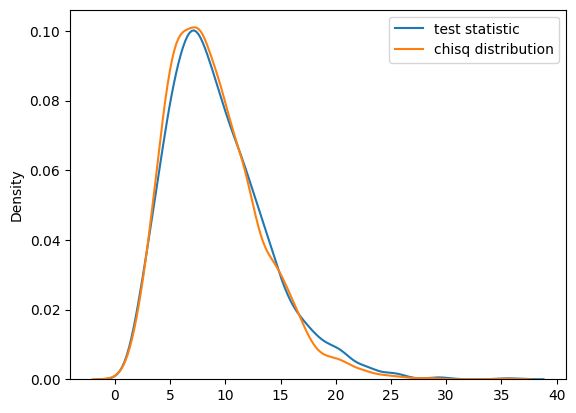

In [7]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(K-1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()